# Project 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cProfile
import scipy.sparse.linalg

In [2]:
%matplotlib notebook

## Part 1: Gaussian quadrature

In [3]:
def quadrature1D(a, b, Nq, g):
    # Function which performs quadrature in 1D
    # of function g over the interval [a,b] with
    # Nq quadrature points where Nq = 1, 2, 3, or 4

    # Calculating half of the interval length
    h = (b-a)/2
    zq = np.array([-np.sqrt(3/5),0,np.sqrt(3/5)])
    pq = np.array([5/9,8/9,5/9])
        
    return h * sum(pq * g(h*zq+(a+b)/2))

### 1.2 2D quadrature

In [4]:
#Define a cross-product function. Numpy has a slow one
def cross_product(p1, p2, p3):
    P = p1-p3
    Q = p2-p3
    cross = P[0]*Q[1]-P[1]*Q[0]
    absolute = abs(cross)
    return absolute

In [5]:
zq = np.array([[1/2,1/2,0],[1/2,0,1/2],[0,1/2,1/2]])
pq = np.ones(3)/3

def quadrature2D(p1,p2,p3, Nq, g):
    #J = np.absolute(np.cross(p1-p3,p2-p3)) #Endrer np.linalg.norm til np.absolute, siden vi får ut skalarer.
    J = cross_product(p1,p2,p3) #Raskere enn np.cross
    #coords = np.outer(zq[:,0],p1) + np.outer(zq[:,1],p2) + np.outer(zq[:,2],p3 )
    x = zq[:,0]*p1[0] + zq[:,1]*p2[0] + zq[:,2]*p3[0]
    y = zq[:,0]*p1[1] + zq[:,1]*p2[1] + zq[:,2]*p3[1]
    
    #I = J/2 * np.sum(pq * g(coords[:,0],coords[:,1]))
    I = J/2 * sum(pq * g(x,y))
    return I
"""
def quadrature2D(p1, p2, p3, Nq, g):
    # Function which performs quadrature in 2D
    # of function g over the triangle T with verticies
    # p1, p2, and p3 with Nq quadrature points where 
    # Nq = 1, 3, or 4
    
    # Jacobian of T
    J = cross_product(p1,p2,p3) #Modified
                    
    # Setting quadrature points and weights from table (barycentric coordinates)
    if Nq == 1:
        zq = np.ones(3)/3
        pq = 1
        coord = zq[0]*p1 + zq[1]*p2 + zq[2]*p3
        I = J/2 * pq * g(coord[0],coord[1])
    elif Nq == 3:
        zq = np.array([[1/2,1/2,0],[1/2,0,1/2],[0,1/2,1/2]])
        pq = np.ones(3)/3
    elif Nq == 4:
        zq = np.array([[1/3,1/3,1/3],[3/5,1/5,1/5],[1/5,3/5,1/5],[1/5,1/5,3/5]])
        pq = np.array([-9/16,25/48,25/48,25/48])
    else:
        print("Error: value of Nq is not allowed")
        
    # Calculating the coordinates in real-space and approx integral I
    if Nq != 1:
        coords = np.outer(zq[:,0],p1) + np.outer(zq[:,1],p2) + np.outer(zq[:,2],p3 )
        I = J/2 * sum(pq * g(coords[:,0],coords[:,1]))
    
    return I
"""

'\ndef quadrature2D(p1, p2, p3, Nq, g):\n    # Function which performs quadrature in 2D\n    # of function g over the triangle T with verticies\n    # p1, p2, and p3 with Nq quadrature points where \n    # Nq = 1, 3, or 4\n    \n    # Jacobian of T\n    J = cross_product(p1,p2,p3) #Modified\n                    \n    # Setting quadrature points and weights from table (barycentric coordinates)\n    if Nq == 1:\n        zq = np.ones(3)/3\n        pq = 1\n        coord = zq[0]*p1 + zq[1]*p2 + zq[2]*p3\n        I = J/2 * pq * g(coord[0],coord[1])\n    elif Nq == 3:\n        zq = np.array([[1/2,1/2,0],[1/2,0,1/2],[0,1/2,1/2]])\n        pq = np.ones(3)/3\n    elif Nq == 4:\n        zq = np.array([[1/3,1/3,1/3],[3/5,1/5,1/5],[1/5,3/5,1/5],[1/5,1/5,3/5]])\n        pq = np.array([-9/16,25/48,25/48,25/48])\n    else:\n        print("Error: value of Nq is not allowed")\n        \n    # Calculating the coordinates in real-space and approx integral I\n    if Nq != 1:\n        coords = np.outer(zq[:

In [6]:
"""
test = lambda x,y: np.log(x+y)

Nqs = [1,3,4]
valueI = np.zeros(len(Nqs))
actualI = -3/2-32*np.log(2)/3+25*np.log(5)/4

for i in range(len(Nqs)):
    valueI[i] = quadrature2D(np.array([1,0]), np.array([3,1]), np.array([3,2]), Nqs[i], test)
    
error = np.abs(actualI - valueI)

fig, ax = plt.subplots()
ax.semilogy(Nqs,error)
ax.set_ylabel('error in integral')
ax.set_xlabel('Nq')
#plt.savefig('1_2.pdf')
"""

"\ntest = lambda x,y: np.log(x+y)\n\nNqs = [1,3,4]\nvalueI = np.zeros(len(Nqs))\nactualI = -3/2-32*np.log(2)/3+25*np.log(5)/4\n\nfor i in range(len(Nqs)):\n    valueI[i] = quadrature2D(np.array([1,0]), np.array([3,1]), np.array([3,2]), Nqs[i], test)\n    \nerror = np.abs(actualI - valueI)\n\nfig, ax = plt.subplots()\nax.semilogy(Nqs,error)\nax.set_ylabel('error in integral')\nax.set_xlabel('Nq')\n#plt.savefig('1_2.pdf')\n"

## Part 2: Poisson in 2 dimensions

### 2.4 Implementation

In [7]:
from getdisc import GetDisc, NodalPoints, FreeBoundary, CircleData

In [8]:
"""
sizes = [4,16,21]

fig, ax = plt.subplots(1,3,sharey = True,figsize=(15, 5)) 

for i in range(len(sizes)):
    circle = plt.Circle((0, 0), 1, fill=False)
    ax[i].add_patch(circle)
    
    p,elements,edges = GetDisc(sizes[i])
    ax[i].scatter(p[:,0],p[:,1])
    
    # Plot of the lines in the triangulation
    for j in range(len(elements)):
        ax[i].plot([p[elements[j,0],0],p[elements[j,1],0]],[p[elements[j,0],1],p[elements[j,1],1]])
        ax[i].plot([p[elements[j,2],0],p[elements[j,1],0]],[p[elements[j,2],1],p[elements[j,1],1]])
        ax[i].plot([p[elements[j,0],0],p[elements[j,2],0]],[p[elements[j,0],1],p[elements[j,2],1]])
        
#plt.savefig('2_4.pdf')
"""

"\nsizes = [4,16,21]\n\nfig, ax = plt.subplots(1,3,sharey = True,figsize=(15, 5)) \n\nfor i in range(len(sizes)):\n    circle = plt.Circle((0, 0), 1, fill=False)\n    ax[i].add_patch(circle)\n    \n    p,elements,edges = GetDisc(sizes[i])\n    ax[i].scatter(p[:,0],p[:,1])\n    \n    # Plot of the lines in the triangulation\n    for j in range(len(elements)):\n        ax[i].plot([p[elements[j,0],0],p[elements[j,1],0]],[p[elements[j,0],1],p[elements[j,1],1]])\n        ax[i].plot([p[elements[j,2],0],p[elements[j,1],0]],[p[elements[j,2],1],p[elements[j,1],1]])\n        ax[i].plot([p[elements[j,0],0],p[elements[j,2],0]],[p[elements[j,0],1],p[elements[j,2],1]])\n        \n#plt.savefig('2_4.pdf')\n"

### 2.5 Stiffness matrix

In [9]:
def tri_row_func1(row, p, A, alpha, beta):
    area = 1/2 * cross_product(p[row[0]], p[row[1]], p[row[2]])
    C = np.linalg.solve([[1,p[row[0],0],p[row[0],1]],
                             [1,p[row[1],0],p[row[1],1]],
                             [1,p[row[2],0],p[row[2],1]]],
                            np.identity(3))
    rows = np.array([row, row, row])
    A[rows, rows.transpose()] += area*(C[1,alpha] * C[1,beta] + C[2,alpha] * C[2,beta])
    

def StiffnessMatrix(N):
    # Function which creates the stiffness matrix
    # for a triangulation with N nodes

    # Get the triangulation
    p,tri,edge = GetDisc(N)
    
    A = np.zeros((N,N))
    alpha = np.array([[0,0,0], [1,1,1], [2,2,2]])
    beta = alpha.transpose()
    
    # Loop over the elements to build A
    np.apply_along_axis(tri_row_func1, 1, tri, p, A, alpha, beta)
    
    return A

In [10]:
"""
for N in [10,100,1000]:
    A = StiffnessMatrix(N)
    print('Number of nodes: ' + str(N))
    print('Rank of matrix A: ' + str(np.linalg.matrix_rank(A)))
    print('')
"""

"\nfor N in [10,100,1000]:\n    A = StiffnessMatrix(N)\n    print('Number of nodes: ' + str(N))\n    print('Rank of matrix A: ' + str(np.linalg.matrix_rank(A)))\n    print('')\n"

### 2.6 Right hand side

In [11]:
def tri_row_func2(row, p, f, F):
        C = np.linalg.solve([[1,p[row[0],0],p[row[0],1]],
                             [1,p[row[1],0],p[row[1],1]],
                             [1,p[row[2],0],p[row[2],1]]],
                            np.identity(3))
        F[row] += quadrature2D(p[row[0]], p[row[1]], p[row[2]], 3, lambda x,y: f(x,y)*(C[0,[0,1,2]] + C[1,[0,1,2]]*x + C[2,[0,1,2]]*y))

def LoadVector(N, f):
    # N is number of nodes in the triangulation
    # f is the right hand side
    
    p,tri,edge = GetDisc(N)
    
    #Solution storrage
    F = np.zeros(N)
    
    # Loop over all elements, over rows
    np.apply_along_axis(tri_row_func2, 1, tri, p, f, F)
        
    return F

In [12]:
#Right hand side in the model problem
f = lambda x,y: -8*np.pi*np.cos(2*np.pi*(x**2+y**2)) + 16*np.pi**2*(x**2 + y**2)*np.sin(2*np.pi*(x**2 + y**2))
#def f(x,y):
#    return -8*np.pi*np.cos(2*math.pi*(x**2+y**2)) + 16*np.pi**2*(x**2 + y**2)*np.sin(2*np.pi*(x**2 + y**2))

#Exact solution of the model problem
def u_ex(x,y):
    return np.sin(2*np.pi*(x**2 + y**2))

### 2.7 Boundary conditions

In [13]:
#We solve the system with boundary conditions directly

def Laplace2Dsolver(N, f):
    
    #Makes the matrix without considering the boundary
    Atilde =  StiffnessMatrix(N)
    
    #Makes the right hand side without considering the boundary
    Ftilde = LoadVector(N, f)
    
    p,tri,edge = GetDisc(N)
    
    #Define the size the reduced system will have, N - #boundary-nodes
    intN = N - np.size(edge,0)
    
    #Slice the matrix to impose the boundary
    A = Atilde[:intN, :intN]
    
    #Slice the F-vector to be correct size
    F = Ftilde[:intN]
    
    #Solve the system
    u = scipy.sparse.linalg.spsolve(A,F)
    
    return u

### 2.8 Verification

In [14]:
"""
N = 20000

cProfile.run("Laplace2Dsolver(N, f)", sort="tottime")
p,tri,edge = GetDisc(N)
u = Laplace2Dsolver(N, f)
u_w_boundary = np.zeros(len(p))
u_w_boundary[:len(u)] = u
    
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(p[:,0],p[:,1],u_w_boundary)
ax.set_title('Numeric solution')
#fig.savefig('2_8_numeric.pdf')

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(p[:,0],p[:,1],u_ex(p[:,0],p[:,1]))
ax.set_title('Exact solution')
#fig.savefig('2_8_exact.pdf')

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(p[:,0],p[:,1],u_ex(p[:,0],p[:,1])-u_w_boundary)
ax.set_title('Error')
#fig.savefig('2_8_error.pdf')
"""

'\nN = 20000\n\ncProfile.run("Laplace2Dsolver(N, f)", sort="tottime")\np,tri,edge = GetDisc(N)\nu = Laplace2Dsolver(N, f)\nu_w_boundary = np.zeros(len(p))\nu_w_boundary[:len(u)] = u\n    \nfig, ax = plt.subplots(subplot_kw={"projection": "3d"})\nax.plot_trisurf(p[:,0],p[:,1],u_w_boundary)\nax.set_title(\'Numeric solution\')\n#fig.savefig(\'2_8_numeric.pdf\')\n\nfig, ax = plt.subplots(subplot_kw={"projection": "3d"})\nax.plot_trisurf(p[:,0],p[:,1],u_ex(p[:,0],p[:,1]))\nax.set_title(\'Exact solution\')\n#fig.savefig(\'2_8_exact.pdf\')\n\nfig, ax = plt.subplots(subplot_kw={"projection": "3d"})\nax.plot_trisurf(p[:,0],p[:,1],u_ex(p[:,0],p[:,1])-u_w_boundary)\nax.set_title(\'Error\')\n#fig.savefig(\'2_8_error.pdf\')\n'

In [15]:
"""
N = [11,51,1001,1501,3000, 4000, 5000,10000]

error = np.zeros(len(N))

for i in range(len(N)):
    p,tri,edge = GetDisc(N[i])
    u = Laplace2Dsolver(N[i], f)
    error[i] = np.max(np.abs(u-u_ex(p[:len(u),0],p[:len(u),1])))
error

fig, ax = plt.subplots()
ax.semilogy(N,error)
ax.set_xlabel('N')
ax.set_ylabel('error')
ax.set_title('Max-Error')
#fig.savefig('2_8_maxerror.pdf')
"""

"\nN = [11,51,1001,1501,3000, 4000, 5000,10000]\n\nerror = np.zeros(len(N))\n\nfor i in range(len(N)):\n    p,tri,edge = GetDisc(N[i])\n    u = Laplace2Dsolver(N[i], f)\n    error[i] = np.max(np.abs(u-u_ex(p[:len(u),0],p[:len(u),1])))\nerror\n\nfig, ax = plt.subplots()\nax.semilogy(N,error)\nax.set_xlabel('N')\nax.set_ylabel('error')\nax.set_title('Max-Error')\n#fig.savefig('2_8_maxerror.pdf')\n"

In [16]:
"""
N = [100, 200, 800, 1600, 2000,10000]
error = np.zeros(len(N))

for i in range(len(N)):
    p,tri,edge = GetDisc(N[i])
    intN = N[i] - np.size(edge,0)
    
    u = Laplace2Dsolver(N[i], f)
    
    uExact = u_ex(p[:,[0]],p[:,[1]])

    uExact = uExact[:intN]
    
    e = np.zeros(intN)
    for j in range(len(uExact)):
        e[j] = (uExact[j] - u[j])
    
    Atilde = StiffnessMatrix(N[i])
    
    A = Atilde[:intN, :intN]
   
    error1 = np.linalg.solve(A,e)
    error2 = np.dot(e, error1)
    error[i] = error2
    
fig, ax = plt.subplots()
ax.semilogy(N,error)
ax.set_xlabel('N')
ax.set_ylabel('error')
ax.set_title('Energy-Error')
#fig.savefig('2_8_energierror.pdf')
"""

"\nN = [100, 200, 800, 1600, 2000,10000]\nerror = np.zeros(len(N))\n\nfor i in range(len(N)):\n    p,tri,edge = GetDisc(N[i])\n    intN = N[i] - np.size(edge,0)\n    \n    u = Laplace2Dsolver(N[i], f)\n    \n    uExact = u_ex(p[:,[0]],p[:,[1]])\n\n    uExact = uExact[:intN]\n    \n    e = np.zeros(intN)\n    for j in range(len(uExact)):\n        e[j] = (uExact[j] - u[j])\n    \n    Atilde = StiffnessMatrix(N[i])\n    \n    A = Atilde[:intN, :intN]\n   \n    error1 = np.linalg.solve(A,e)\n    error2 = np.dot(e, error1)\n    error[i] = error2\n    \nfig, ax = plt.subplots()\nax.semilogy(N,error)\nax.set_xlabel('N')\nax.set_ylabel('error')\nax.set_title('Energy-Error')\n#fig.savefig('2_8_energierror.pdf')\n"

## Part 3: Neumann boundary conditions

###  3.3 Gauss quadrature

In [17]:
def linequadrature2D(a,b,Nq,g):
    #Takes two points a and b in 2D, Nq which is the number of interpolation points, and a function g. 
    #Returns the straight-line integral from a to b of g. 
    
    #These quanteties are discribed in the report. 
    norm = (1/2)*np.sqrt((b[0]-a[0])**2+(b[1]-a[1])**2)
    
    def x(t): 
        return (1/2)*((1-t)*a[0] + (t+1)*b[0])
    def y(t): 
        return (1/2)*((1-t)*a[1] + (t+1)*b[1])
    def f(t):
        return g(x(t), y(t))
    
    u = lambda t: f(t) 
    
    return norm*quadrature1D(-1, 1, Nq, u)

In [18]:
"""
#Check that we get the correct value for the function described in the project.

def test3(x):
    return np.exp(x)
def test2(u,v):
    return np.exp(u)

Nqs = [1,3,4]
valueI = np.zeros(len(Nqs))
actualI = quadrature1D(1,2,2,test3)

for i in range(len(Nqs)):
    valueI[i] = linequadrature2D(np.array([1,0]), np.array([2,0]), Nqs[i], test2)
    
error = np.abs(actualI - valueI)

fig, ax = plt.subplots()
ax.semilogy(Nqs,error)
ax.set_ylabel('error in integral')
ax.set_xlabel('Nq')

fig.savefig('3_3.pdf')
"""

"\n#Check that we get the correct value for the function described in the project.\n\ndef test3(x):\n    return np.exp(x)\ndef test2(u,v):\n    return np.exp(u)\n\nNqs = [1,3,4]\nvalueI = np.zeros(len(Nqs))\nactualI = quadrature1D(1,2,2,test3)\n\nfor i in range(len(Nqs)):\n    valueI[i] = linequadrature2D(np.array([1,0]), np.array([2,0]), Nqs[i], test2)\n    \nerror = np.abs(actualI - valueI)\n\nfig, ax = plt.subplots()\nax.semilogy(Nqs,error)\nax.set_ylabel('error in integral')\nax.set_xlabel('Nq')\n\nfig.savefig('3_3.pdf')\n"

In [19]:
def g(x,y):
    return 4*np.pi*np.sqrt(x**2+y**2)*np.cos(2*np.pi*(x**2+y**2)) 

In [20]:
def LoadVectorNeumann(N, f, g):

    p,tri,edge = GetDisc(N)
    F = np.zeros(N)
    res = np.zeros(N)

    for k in range(len(tri)):
        C = np.linalg.solve([[1,p[tri[k,0],0],p[tri[k,0],1]],
                             [1,p[tri[k,1],0],p[tri[k,1],1]],
                             [1,p[tri[k,2],0],p[tri[k,2],1]]],
                            np.identity(3))
        for alpha in range(3):
            i = tri[k, alpha]

            
            def H_ak(x,y):
                return C[0,alpha] + C[1,alpha]*x + C[2,alpha]*y
            def fH_ak(x,y):
                return f(x,y)*H_ak(x,y)  
            

            h = lambda x,y: fH_ak(x,y)

            F[i] = F[i] + quadrature2D(p[tri[k,0]], p[tri[k,1]], p[tri[k,2]], 3, h)

    for e in edge:

        idx_1 = e[0]

        idx_2 = e[1]

        if isNeumann(idx_1) or isNeumann(idx_2):

            if isNeumann(idx_1):

                res[idx_1] += linequadrature2D(p[idx_1],p[idx_2],3,g)/2

            if isNeumann(idx_2):
                res[idx_2] += linequadrature2D(p[idx_1],p[idx_2],3,g)/2

    F = F + res

    return F

In [21]:
def isNeumann(idx):
     return p[idx][1]>0 #here one can choose if >=0 or >0

In [22]:
def Laplace2DsolverNeumann(N, f, g):
    Atilde =  StiffnessMatrix(N)
    Ftilde = LoadVectorNeumann(N, f, g)

    p,tri,edge = GetDisc(N)

    #Makes the matrix without considering the boundary
    Atilde =  StiffnessMatrix(N)

    #Makes the right hand side without considering the boundary
    Ftilde = LoadVectorNeumann(N, f, g)

    p,tri,edge = GetDisc(N)

    NDboundary = 0
    for i in range(N):
        if i in edge[:,0] and p[i,1] < 0:
            NDboundary += 1
    Nend = N - NDboundary
    
    #Slice to be the correct size
    A = Atilde[:Nend, :Nend]    
    F = Ftilde[:Nend]

    #Solve the system
    u = np.linalg.solve(A,F)

    return u

<IPython.core.display.Javascript object>


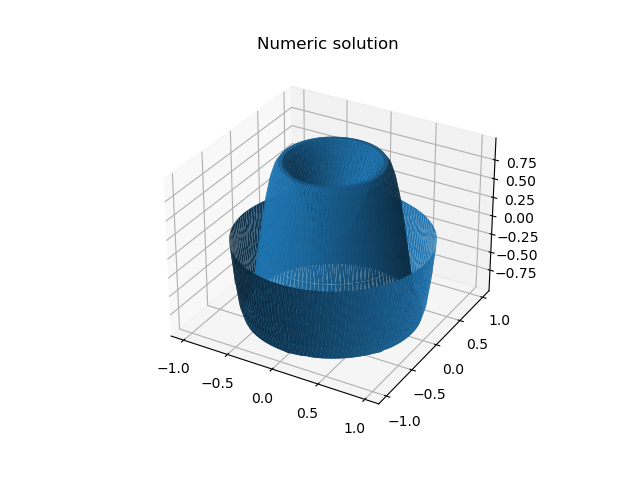

<IPython.core.display.Javascript object>


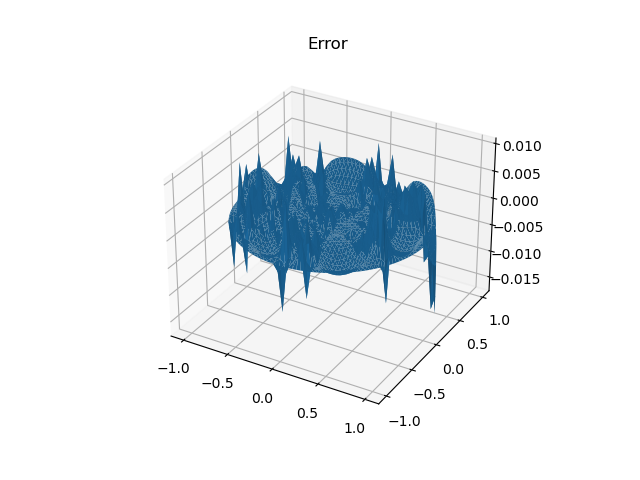

In [23]:
N = 2001

p,tri,edge = GetDisc(N)
u = Laplace2DsolverNeumann(N, f, g)
u_w_boundary = np.zeros(len(p))
u_w_boundary[:len(u)] = u  
    
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#ax.plot_trisurf(p[:len(u),0],p[:len(u),1],u)
ax.plot_trisurf(p[:,0],p[:,1],u_w_boundary)
ax.set_title('Numeric solution')

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(p[:,0],p[:,1],u_ex(p[:,0],p[:,1])-u_w_boundary)
ax.set_title('Error')

fig.show()

### Energy norm error

In [24]:
def errorestimate(p,tri,u,uh):

    error = 0

    for k in range(len(tri)):
        C = np.linalg.solve([[1,p[tri[k,0],0],p[tri[k,0],1]],
                             [1,p[tri[k,1],0],p[tri[k,1],1]],
                             [1,p[tri[k,2],0],p[tri[k,2],1]]],
                              np.identity(3))
        graduh =  uh[tri[k,0]]*np.array([C[1,0],C[2,0]])+uh[tri[k,1]]*np.array([C[1,1],C[2,1]])+uh[tri[k,2]]*np.array([C[1,2],C[2,2]])
        def diff2(x,y):
            J = u_ex_grad(x,y).T-graduh
            return np.sum(J**2,1)
        error = error + quadrature2D(p[tri[k,0]],p[tri[k,1]],p[tri[k,2]],4,diff2)

    return np.sqrt(error)

In [25]:
def u_ex_grad(x,y):
    return 4*np.pi*np.cos(2*np.pi*(x**2+y**2))*np.array([x,y])

/Users/anneasklund/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


<IPython.core.display.Javascript object>


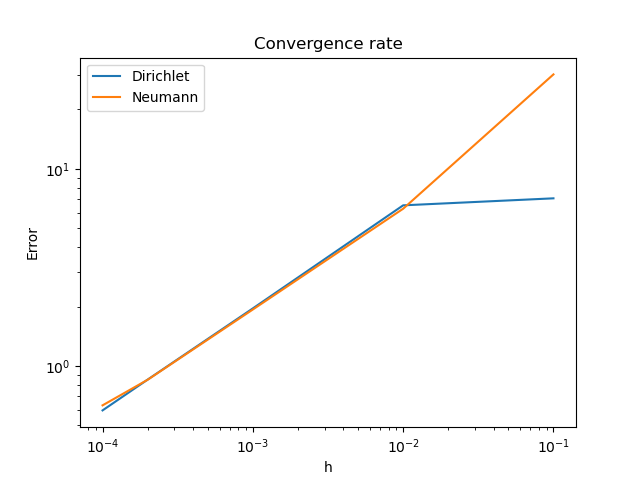

In [26]:
N = np.array([10,100,1000,5000,10000])

error_dirichlet = np.zeros(len(N))
error_neumann = np.zeros(len(N))

for i in range(len(N)):

        p,tri,edge = GetDisc(N[i])

        u_dirichlet = Laplace2Dsolver(N[i], f)
        u_w_boundary_dirichlet = np.zeros(len(p))
        u_w_boundary_dirichlet[:len(u_dirichlet)] = u_dirichlet
        error_dirichlet[i] = errorestimate(p,tri,u_ex,u_w_boundary_dirichlet)

        u_neumann = Laplace2DsolverNeumann(N[i], f, g)
        u_w_boundary_neumann = np.zeros(len(p))
        u_w_boundary_neumann[:len(u_neumann)] = u_neumann
        error_neumann[i] = errorestimate(p,tri,u_ex,u_w_boundary_neumann)

hs = 1/N ### Må sees mer på, kan være feil

fig, ax = plt.subplots()
ax.loglog(hs,error_dirichlet,hs,error_neumann)
ax.legend(['Dirichlet','Neumann'])
ax.set_title('Convergence rate')
ax.set_xlabel('h')
ax.set_ylabel('Error')

fig.show()

In [27]:
print(error_dirichlet)
print(error_neumann)

[7.08431913 6.52767602 1.95797073 0.85324367 0.59466577]
[30.1383925   6.27356412  1.93307028  0.85140169  0.63080901]
